<a href="https://colab.research.google.com/github/christianpratamaa/PemrogramanPython/blob/main/Christian%20Pratama_Tubes%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : CHRISTIAN PRATAMA SITEPU

KELAS : TT-43-G2

NIM : 1101183438


In [17]:
import matplotlib.pyplot as plt
import numpy as np

Parameter-parameter


In [18]:
tipe_area=['Urban','Suburban','Open']
Frek = [700, 900, 1800]
Ht = 80 #meter
Hr = 1.5 #meter
d = np.arange(300, 1001, 3)
#print(d)
ptx = 30000 #mW
gtx = 10 #dB
grx = 2 #dB
BW = 5000000 #Hz

NtL = lambda x : 10*np.log10(x)
LtN = lambda x : 10**(x/10)

ptx_dbm = NtL(ptx) #dalam dBm

Fungsi Pathloss

In [19]:
def cos(Frek,tipe,Ht,Hr,d):
  #Frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #Ht = tinggi tower (meter)
  #Hr = tinggi user (meter)
  #d = jarak (meter)
    if Frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif Frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='Urban' :
        Cm=0
    elif tipe=='Suburban' :
        Cm= -2*((np.log10((Frek/28)**2))-5.4)
    elif tipe=='Open' :
        Cm= -4.78*(np.log10(Frek))+18.33*(np.log10(Frek))-40.94
    else :
        Cm='tipe salah'
    
    aHr = (1.1*np.log10(Frek)-0.7)*Hr-(1.56*np.log10(Frek)-1.8)
    Lp = Ca+(Cb*np.log10(Frek))-(13.83*np.log(Ht))-aHr+((44.9-6.55*np.log10(Ht))*np.log10(d))-Cm
    
    return Lp

Fungsi Daya Terima

In [20]:
def daya_terima(LP,ptx_dbm, gtx,grx):
  prx = ptx_dbm - LP + gtx + grx
  return prx

Fungsi SNR

In [21]:
def snr_rumus(prx,BW):
  No = -174 + 10*np.log10(BW)
  No_num = LtN(No)
  SNR = prx/No_num
  return SNR

Fungsi Cellular Capacity

In [22]:
def caps(d, SNR, BW):
  one = [1]
  one_list = []
  hasil_list = []
  for i in range(len(SNR)):
    one_list = one * len(SNR)
    hasil = one_list[i] + SNR[i]
    hasil_list.append(hasil)
  kapasitas = BW * np.log2(hasil_list)
  return kapasitas

Fungsi pathloss 1

In [23]:
pathloss_Urban = []
pathloss_Suburban = []
pathloss_Open = []

#Urban
def pl_Urban(d,Frek,tipe_area,Ht,Hr):
  f = Frek[2]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,Ht,Hr,d)
    return Urban_1800
pathloss_Urban = pl_Urban(d,Frek,tipe_area,Ht,Hr)

#Suburban
def pl_Suburban(d,Frek,tipe_area,Ht,Hr):
  f = Frek[2]
  tipe = tipe_area[1]
  for i in range(len(d)):
    Suburban_1800 = cos(f,tipe,Ht,Hr,d)
    return Suburban_1800
pathloss_Suburban = pl_Suburban(d,Frek,tipe_area,Ht,Hr)

#Open
def pl_Open(d,Frek,tipe_area,Ht,Hr):
  f = Frek[2]
  tipe = tipe_area[2]
  for i in range(len(d)):
    Open_1800 = cos(f,tipe,Ht,Hr,d)
    return Open_1800
pathloss_Open = pl_Open(d,Frek,tipe_area,Ht,Hr)

Fungsi prx 1

In [24]:
dayaterima_Urban = []
dayaterima_Suburban = []
dayaterima_Open = []

#prx Urban
def prx_Urban(pathloss_Urban,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_Urban)):
    x = daya_terima(pathloss_Urban,ptx_dbm,gtx,grx)
    x_num = LtN(x)
    return x_num
dayaterima_Urban = prx_Urban(pathloss_Urban,ptx_dbm,gtx,grx)

#prx Suburban
def prx_Suburban(pathloss_Suburban,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_Suburban)):
    y = daya_terima(pathloss_Suburban,ptx_dbm,gtx,grx)
    y_num = LtN(y)
    return y_num
dayaterima_Suburban = prx_Suburban(pathloss_Suburban,ptx_dbm,gtx,grx)

#prx Open
def prx_Open(pathloss_Open,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_Open)):
    z = daya_terima(pathloss_Open,ptx_dbm,gtx,grx)
    z_num = LtN(z)
    return z_num
dayaterima_Open = prx_Open(pathloss_Open,ptx_dbm,gtx,grx)

Fungsi SNR 1

In [25]:
SNR_Urban = []
SNR_Suburban = []
SNR_Open = []

#snr Urban
def snr_Urban(BW,dayaterima_Urban):
  for i in range(len(dayaterima_Urban)):
    snrU = snr_rumus(dayaterima_Urban,BW)
    return snrU
SNR_Urban = snr_Urban(BW,dayaterima_Urban)
#print(SNR_Urban)

#snr Suburban
def snr_Suburban(BW,dayaterima_Suburban):
  for i in range(len(dayaterima_Suburban)):
    snrS = snr_rumus(dayaterima_Suburban,BW)
    return snrS
SNR_Suburban = snr_Suburban(BW,dayaterima_Suburban)
#print(SNR_Suburban)

#snr Open
def snr_Open(BW,dayaterima_Open):
  for i in range(len(dayaterima_Open)):
    snrO = snr_rumus(dayaterima_Open,BW)
    return snrO
SNR_Open = snr_Open(BW,dayaterima_Open)
#print(SNR_Open)

Fungsi Cellular Capacity 1

In [26]:
IR_Urban = []
IR_Suburban = []
IR_Open = []

#Urban
def ir_urban(d, SNR_Urban, BW):
  for i in range(len(SNR_Urban)):
    irU = caps(d, SNR_Urban, BW)
  return irU
IR_Urban = ir_urban(d, SNR_Urban, BW)

#Suburban
def ir_suburban(d, SNR_Suburban, BW):
  for i in range(len(SNR_Suburban)):
    irS = caps(d, SNR_Suburban, BW)
  return irS
IR_Suburban = ir_suburban(d, SNR_Suburban, BW)

#Open
def ir_open(d, SNR_Open, BW):
  for i in range(len(SNR_Open)):
    irO = caps(d, SNR_Open, BW)
  return irO
IR_Open = ir_open(d, SNR_Open, BW)

Fungsi pathloss 2

In [27]:
pathloss_700 = []
pathloss_900 = []
pathloss_1800 = []

#700
def pl_700(d,Frek,tipe_area,Ht,Hr):
  f = Frek[0]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_700 = cos(f,tipe,Ht,Hr,d)
    return Urban_700
pathloss_700 = pl_700(d,Frek,tipe_area,Ht,Hr)

#900
def pl_900(d,Frek,tipe_area,Ht,Hr):
  f = Frek[1]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_900 = cos(f,tipe,Ht,Hr,d)
    return Urban_900
pathloss_900 = pl_900(d,Frek,tipe_area,Ht,Hr)

#1800
def pl_1800(d,Frek,tipe_area,Ht,Hr):
  f = Frek[2]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,Ht,Hr,d)
    return Urban_1800
pathloss_1800 = pl_1800(d,Frek,tipe_area,Ht,Hr)

Fungsi prx 2

In [28]:
dayaterima_700 = []
dayaterima_900 = []
dayaterima_1800 = []

#prx 700
def prx_700(pathloss_700,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_700)):
    a = daya_terima(pathloss_700,ptx_dbm,gtx,grx)
    a_num = LtN(a)
    return a_num
dayaterima_700 = prx_700(pathloss_700,ptx_dbm,gtx,grx)

#prx 900
def prx_900(pathloss_900,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_900)):
    b = daya_terima(pathloss_900,ptx_dbm,gtx,grx)
    b_num = LtN(b)
    return b_num
dayaterima_900 = prx_900(pathloss_900,ptx_dbm,gtx,grx)

#prx 1800
def prx_1800(pathloss_1800,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_1800)):
    c = daya_terima(pathloss_1800,ptx_dbm,gtx,grx)
    c_num = LtN(c)
    return c_num
dayaterima_1800 = prx_1800(pathloss_1800,ptx_dbm,gtx,grx)

Fungsi SNR 2

In [29]:
SNR_700 = []
SNR_900 = []
SNR_1800 = []

#snr 700
def snr_700(BW,dayaterima_700):
  for i in range(len(dayaterima_700)):
    snr1 = snr_rumus(dayaterima_700,BW)
    return snr1
SNR_700 = snr_700(BW,dayaterima_700)
#print(SNR_700)

#snr 900
def snr_900(BW,dayaterima_900):
  for i in range(len(dayaterima_900)):
    snr2 = snr_rumus(dayaterima_900,BW)
    return snr2
SNR_900 = snr_900(BW,dayaterima_900)
#print(SNR_900)


#snr 1800
def snr_1800(BW,dayaterima_1800):
  for i in range(len(dayaterima_1800)):
    snr3 = snr_rumus(dayaterima_1800,BW)
    return snr3
SNR_1800 = snr_1800(BW,dayaterima_1800)
#print(SNR_1800)


Fungsi Cellular Capacity 2

In [30]:
IR_700 = []
IR_900 = []
IR_1800 = []

#700
def ir_700(d, SNR_700, BW):
  for i in range(len(SNR_700)):
    ir1 = caps(d, SNR_700, BW)
    return ir1
IR_700 = ir_700(d, SNR_700, BW)

#900
def ir_900(d, SNR_900, BW):
  for i in range(len(SNR_900)):
    ir2 = caps(d, SNR_900, BW)
    return ir2
IR_900 = ir_900(d, SNR_900, BW)

#1800
def ir_1800(d, SNR_1800, BW):
  for i in range(len(SNR_1800)):
    ir3 = caps(d, SNR_1800, BW)
    return ir3
IR_1800 = ir_1800(d, SNR_1800, BW)

GRAFIK

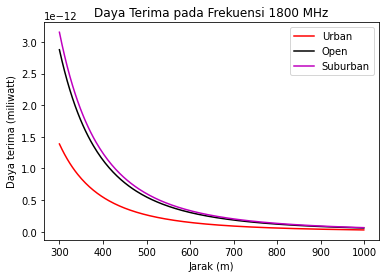

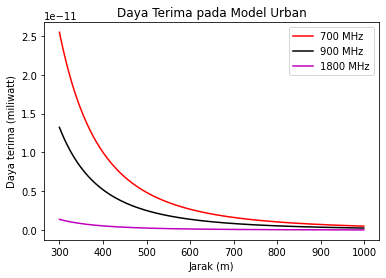

In [31]:
#Grafik daya terima 
def graphprx_1():
  plt.figure()
  plt.plot(d,dayaterima_Urban,'r', label='Urban')
  plt.plot(d,dayaterima_Open,'k', label='Open')
  plt.plot(d,dayaterima_Suburban,'m', label='Suburban')
  plt.legend()
  plt.title("Daya Terima pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()
 
def graphprx_2():
  plt.figure()
  plt.plot(d,dayaterima_700,'r', label='700 MHz')
  plt.plot(d,dayaterima_900,'k', label='900 MHz')
  plt.plot(d,dayaterima_1800,'m', label='1800 MHz')
  plt.legend()
  plt.title("Daya Terima pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()

graphprx_1()
graphprx_2()

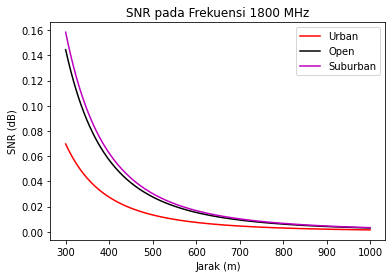

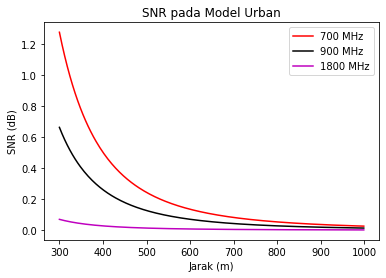

In [32]:
#PLOT SNR
def graph_snr1():
  plt.figure()
  plt.plot(d,SNR_Urban,'r', label='Urban')
  plt.plot(d,SNR_Open,'k', label='Open')
  plt.plot(d,SNR_Suburban,'m', label='Suburban')
  plt.legend()
  plt.title("SNR pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()
 
def graph_snr2():
  plt.figure()
  plt.plot(d,SNR_700,'r', label='700 MHz')
  plt.plot(d,SNR_900,'k', label='900 MHz')
  plt.plot(d,SNR_1800,'m', label='1800 MHz')
  plt.legend()
  plt.title("SNR pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()

graph_snr1()
graph_snr2()

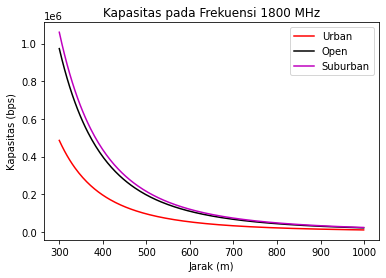

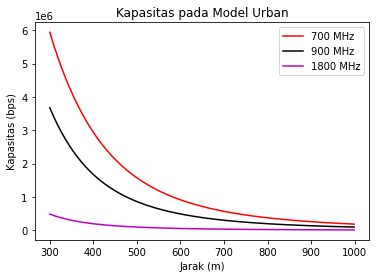

In [33]:
#PLOT KAPASITAS
def graph_ir1():
  plt.figure()
  plt.plot(d,IR_Urban,'r', label='Urban')
  plt.plot(d,IR_Open,'k', label='Open')
  plt.plot(d,IR_Suburban,'m', label='Suburban')
  plt.legend()
  plt.title("Kapasitas pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

def graph_ir2():
  plt.figure()
  plt.plot(d,IR_700,'r', label='700 MHz')
  plt.plot(d,IR_900,'k', label='900 MHz')
  plt.plot(d,IR_1800,'m', label='1800 MHz')
  plt.legend()
  plt.title("Kapasitas pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

graph_ir1()
graph_ir2()